# Phase 3

## SQL Operations

Note: Create a separate table for each file and give a meaningful name.

When you are inserting make sure you are NOT inserting the column name in the table, else you don’t get a result.

### 3.1	Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

### 3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

### 3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

### 3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

### 3.5	Write SQL query to find the highest number of dacoity/robbery in which district.

### 3.6	Write SQL query to find in which districts(All) the lowest number of murders happened

### 3.7	Write SQL query to find the number of murders in ascending order in district and yearwise.

### 3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

### 3.8.2	Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

### 3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

### 3.8.4	Use appropriate graphs to show your data (the result of 3.8.3)


# Import Nessceray Libraries. 

In [45]:
import sqlite3
import pandas as pd


## 3.1 Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table


In [39]:
# Connect to SQLite database (creates a new database if it doesn't exist)
conn = sqlite3.connect('crime_database.db')
cursor = conn.cursor()

# Create the 'crime_records' table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS crime_records (
        id INTEGER PRIMARY KEY,
        state TEXT,
        district TEXT,
        year INTEGER,
        rape_cases INTEGER,
        kidnapping_abduction_cases INTEGER
    )
''')

# Commit the changes and close the connection
conn.commit()
conn.close()

In [41]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/Users/sneha/Desktop/42_District_wise_crimes_committed_against_women_2001_2012.csv')

# Connect to SQLite database
conn = sqlite3.connect('crime_database.db')

# Write the DataFrame to the SQLite database
df.to_sql('crime_records', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

In [42]:
# Load the ipython-sql extension
%load_ext sql

# Connect to the SQLite database
%sql sqlite:///crime_database.db


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [43]:
%reload_ext sql

In [44]:
# Retrieve the first few rows from the 'crime_records' table
%sql SELECT * FROM crime_records LIMIT 5;


   sqlite://
 * sqlite:///crime_database.db
Done.


STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


### 3.2 Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

In [53]:
%%sql
SELECT
    state,
    district,
    year,
    crime_type,
    max_cases
FROM (
    SELECT
        "STATE/UT" as state,
        DISTRICT,
        Year as year,
        'Rape' as crime_type,
        Rape as max_cases
    FROM
        crime_records
    WHERE
        DISTRICT != 'TOTAL'

    UNION ALL

    SELECT
        "STATE/UT" as state,
        DISTRICT,
        Year as year,
        'Kidnapping' as crime_type,
        "Kidnapping and Abduction" as max_cases
    FROM
        crime_records
    WHERE
        DISTRICT != 'TOTAL'
) AS combined
ORDER BY
    max_cases DESC
LIMIT 1;



   sqlite://
 * sqlite:///crime_database.db
Done.


state,DISTRICT,year,crime_type,max_cases
DELHI,DELHI UT TOTAL,2012,Kidnapping,2160


In [57]:
%%sql

WITH MaxRape AS (
    SELECT
        "STATE/UT" as state,
        DISTRICT,
        Year as year,
        'Rape' as crime_type,
        Rape as max_cases
    FROM
        crime_records
    WHERE
        DISTRICT NOT LIKE '%TOTAL%'
    ORDER BY
        max_cases DESC
    LIMIT 1
),

MaxKidnapping AS (
    SELECT
        "STATE/UT" as state,
        DISTRICT,
        Year as year,
        'Kidnapping' as crime_type,
        "Kidnapping and Abduction" as max_cases
    FROM
        crime_records
    WHERE
        DISTRICT NOT LIKE '%TOTAL%'
    ORDER BY
        max_cases DESC
    LIMIT 1
)

SELECT * FROM MaxRape
UNION ALL
SELECT * FROM MaxKidnapping;


   sqlite://
 * sqlite:///crime_database.db
Done.


state,DISTRICT,year,crime_type,max_cases
WEST BENGAL,MURSHIDABAD,2009,Rape,568
WEST BENGAL,MURSHIDABAD,2011,Kidnapping,492


### 3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year


In [59]:
%%sql

WITH MinRape AS (
    SELECT
        "STATE/UT" as state,
        DISTRICT,
        Year as year,
        'Rape' as crime_type,
        Rape as min_cases
    FROM
        crime_records
    WHERE
        DISTRICT NOT LIKE '%TOTAL%'
    ORDER BY
        min_cases ASC
    LIMIT 1
),

MinKidnapping AS (
    SELECT
        "STATE/UT" as state,
        DISTRICT,
        Year as year,
        'Kidnapping' as crime_type,
        "Kidnapping and Abduction" as min_cases
    FROM
        crime_records
    WHERE
        DISTRICT NOT LIKE '%TOTAL%'
    ORDER BY
        min_cases ASC
    LIMIT 1
)

SELECT * FROM MinRape
UNION ALL
SELECT * FROM MinKidnapping;


   sqlite://
 * sqlite:///crime_database.db
Done.


state,DISTRICT,year,crime_type,min_cases
ANDHRA PRADESH,GUNTAKAL RLY.,2001,Rape,0
ANDHRA PRADESH,GUNTAKAL RLY.,2001,Kidnapping,0


### 3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table


In [66]:
# Connect to SQLite database (creates a new database if it doesn't exist)
conn = sqlite3.connect('crime_database.db')
cursor = conn.cursor()

# Create the 'crime_records' table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS crimes_against_st (
    id INTEGER PRIMARY KEY,
    state TEXT,
    district TEXT,
    year INTEGER,
    rape_cases INTEGER,
    kidnapping_abduction_cases INTEGER,
    dowry_deaths INTEGER,
    assault_on_women INTEGER,
    insult_to_modesty INTEGER,
    cruelty_by_husband INTEGER,
    importation_of_girls INTEGER 
    )

''')

# Commit the changes and close the connection
conn.commit()
conn.close()

In [68]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/Users/sneha/Desktop/02_District_wise_crimes_committed_against_ST_2001_2012.csv')

# Connect to SQLite database
conn = sqlite3.connect('crime_database.db')

# Write the DataFrame to the SQLite database
df.to_sql('crime_against_st', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

In [69]:
# Retrieve the first few rows from the 'crime_records' table
%sql SELECT * FROM crime_against_st LIMIT 5;


   sqlite://
 * sqlite:///crime_database.db
Done.


STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14


### 3.5	Write SQL query to find the highest number of dacoity/robbery in which district.


In [71]:
%%sql

WITH MaxDacoity AS (
    SELECT
        "STATE/UT" as state,
        DISTRICT,
        Year as year,
        'Dacoity' as crime_type,
        Dacoity as max_cases
    FROM
        crime_against_st
    WHERE
        DISTRICT NOT LIKE '%TOTAL%'
    ORDER BY
        max_cases DESC
    LIMIT 1
),

MaxRobbery AS (
    SELECT
        "STATE/UT" as state,
        DISTRICT,
        Year as year,
        'Robbery' as crime_type,
        "Robbery" as max_cases
    FROM
        crime_against_st
    WHERE
        DISTRICT NOT LIKE '%TOTAL%'
    ORDER BY
        max_cases DESC
    LIMIT 1
)

SELECT * FROM MaxDacoity
UNION ALL
SELECT * FROM MaxRobbery;


   sqlite://
 * sqlite:///crime_database.db
Done.


state,DISTRICT,year,crime_type,max_cases
GUJARAT,DAHOD,2004,Dacoity,29
GUJARAT,DAHOD,2001,Robbery,32


### 3.6	Write SQL query to find in which districts(All) the lowest number of murders happened


In [75]:
%%sql
SELECT
    district,
    MIN(Murder) AS min_cases
FROM crime_against_st
    
GROUP BY
    district
ORDER BY
    min_cases ASC;


   sqlite://
 * sqlite:///crime_database.db
Done.


DISTRICT,min_cases
24 PARGANAS NORTH,0
24 PARGANAS SOUTH,0
A and N ISLANDS,0
ADILABAD,0
AGRA,0
AHMEDABAD COMMR.,0
AHMEDABAD RURAL,0
AHMEDNAGAR,0
AHWA-DANG,0
AIZAWL,0


### 3.7	Write SQL query to find the number of murders in ascending order in district and yearwise.


In [76]:
%%sql
SELECT
    DISTRICT,
    Year,
    Murder
FROM
    crime_against_st
ORDER BY
    DISTRICT ASC,
    Year ASC,
    Murder ASC;


   sqlite://
 * sqlite:///crime_database.db
Done.


DISTRICT,Year,Murder
24 PARGANAS NORTH,2001,0
24 PARGANAS NORTH,2002,0
24 PARGANAS NORTH,2003,0
24 PARGANAS NORTH,2004,0
24 PARGANAS NORTH,2005,0
24 PARGANAS NORTH,2006,0
24 PARGANAS NORTH,2007,0
24 PARGANAS NORTH,2008,0
24 PARGANAS NORTH,2009,0
24 PARGANAS NORTH,2010,0


### 3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table


In [78]:
# Read the CSV file into a pandas DataFrame
df3 = pd.read_csv('/Users/sneha/Desktop/01_District_wise_crimes_committed_IPC_2001_2012.csv')

# Connect to SQLite database
conn = sqlite3.connect('crime_database.db')

# Write the DataFrame to the SQLite database
df3.to_sql('crimes', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

In [80]:
%sql SELECT * FROM crimes LIMIT 5;


   sqlite://
 * sqlite:///crime_database.db
Done.


STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,30,16,9,0,41,198,199,22,177,78,16,104,1,30,1131,16,149,34,175,0,181,1518,4154
ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,30,23,8,0,16,191,366,57,309,168,11,65,8,69,1543,7,118,24,154,0,270,754,4125
ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,34,25,4,0,14,237,723,164,559,156,33,209,9,38,2088,14,112,83,186,0,404,1262,5818
ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,20,5,1,0,4,98,173,36,137,164,12,37,2,23,795,17,126,38,57,0,233,1181,3140
ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,26,23,4,0,25,437,1021,150,871,70,50,220,3,41,1244,12,109,58,247,0,431,2313,6507


### 3.8.2	Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.


In [86]:
%%sql
SELECT
    "STATE/UT" AS state,
    YEAR,
    DISTRICT,
    MURDER AS murders
FROM
    crimes
WHERE
    (YEAR, MURDER, DISTRICT) IN (
        SELECT
            YEAR,
            MAX(MURDER) AS max_murders,
            DISTRICT
        FROM
            crimes
        WHERE
            DISTRICT NOT LIKE '%TOTAL%'
        GROUP BY
            YEAR
    )
ORDER BY
    YEAR;


   sqlite://
 * sqlite:///crime_database.db
Done.


state,YEAR,DISTRICT,murders
BIHAR,2001,PATNA,434
BIHAR,2002,PATNA,472
BIHAR,2003,PATNA,484
BIHAR,2004,PATNA,542
BIHAR,2005,PATNA,436
BIHAR,2006,PATNA,338
BIHAR,2007,PATNA,317
BIHAR,2008,PATNA,341
BIHAR,2009,PATNA,314
BIHAR,2010,PATNA,304


### 3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.


In [88]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('crime_database.db')

# SQL query to retrieve data (similar to 3.8.2)
sql_query = """
    SELECT
        "STATE/UT" AS state,
        YEAR,
        DISTRICT,
        MURDER AS murders
    FROM
        crimes
    WHERE
        (YEAR, MURDER, DISTRICT) IN (
            SELECT
                YEAR,
                MAX(MURDER) AS max_murders,
                DISTRICT
            FROM
                crimes
            WHERE
                DISTRICT NOT LIKE '%TOTAL%'
            GROUP BY
                YEAR
        )
    ORDER BY
        YEAR;
"""


# Fetch data into a Pandas DataFrame
df = pd.read_sql_query(sql_query, conn)

# Close the database connection
conn.close()

# Analyze districts that appear 3 or more than 3 years
district_counts = df['DISTRICT'].value_counts()
selected_districts = district_counts[district_counts >= 3].index

# Filter the DataFrame for the selected districts
result_df = df[df['DISTRICT'].isin(selected_districts)]

# Print the result in descending order
result_df = result_df.sort_values(by=['DISTRICT', 'YEAR'], ascending=[False, False])
print(result_df)

    state  YEAR DISTRICT  murders
11  BIHAR  2012    PATNA      356
10  BIHAR  2011    PATNA      248
9   BIHAR  2010    PATNA      304
8   BIHAR  2009    PATNA      314
7   BIHAR  2008    PATNA      341
6   BIHAR  2007    PATNA      317
5   BIHAR  2006    PATNA      338
4   BIHAR  2005    PATNA      436
3   BIHAR  2004    PATNA      542
2   BIHAR  2003    PATNA      484
1   BIHAR  2002    PATNA      472
0   BIHAR  2001    PATNA      434


### 3.8.4	Use appropriate graphs to show your data (the result of 3.8.3)


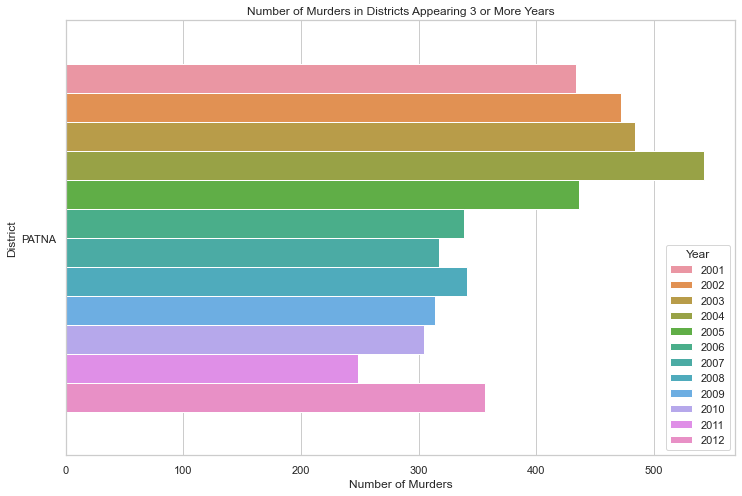

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'result_df' contains the DataFrame from 3.8.3

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='murders', y='DISTRICT', hue='YEAR', data=result_df, dodge=True)
bar_plot.set_title('Number of Murders in Districts Appearing 3 or More Years')
bar_plot.set_xlabel('Number of Murders')
bar_plot.set_ylabel('District')

# Display the legend
bar_plot.legend(title='Year')

# Show the plot
plt.show()
